# Phân tích mức tiêu hao nhiên liệu

In [4]:
import pandas as pd

## 1. ĐỌC DỮ LIỆU

Dữ liệu `mpg.csv` gồm các thông tin như sau:

- **mpg**: Miles/(US) gallon số gallon xăng trên 1 dặm
- **cylinders:** số lượng xilanh
- **displacement:**  Displacement/ dung tích xilanh (cu.in / $inches^3$)
- **horsepower:** công suất theo mã lực
- **weight:** trọng lượng (pound)
- **acceleration:** Gia tốc
- **model_year:** Năm sản xuất
- **origin:** Xuất xứ
- **name:** Tên dòng xe


In [6]:
pg = pd.read_csv(r'D:\Học tập\Qui học năm 2\Kì 2\Thống kê máy tính và ứng dụng\labs\Tài liệu thi GK\mpg.csv')
pg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## 2. TÌM HIỂU DỮ LIỆU

### 2.1 Kiểm tra có dòng nào không có dữ liệu?

In [7]:
pg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

### 2.2 Xóa các dòng không có dữ liệu


In [9]:
pg_no_na = pg.dropna()
pg.shape

(398, 9)

### 2.3 Tìm trung binh, trung vị của các thuộc tính: 'cylinders', 'horsepower', 'weight'

In [11]:
import pandas as pd


# Tính trung bình và trung vị
means = pg[['cylinders', 'horsepower', 'weight']].mean()
medians = pg[['cylinders', 'horsepower', 'weight']].median()

print("Trung bình:")
print(means)

print("\nTrung vị:")
print(medians)


Trung bình:
cylinders        5.454774
horsepower     104.469388
weight        2970.424623
dtype: float64

Trung vị:
cylinders        4.0
horsepower      93.5
weight        2803.5
dtype: float64


### 2.4 Tìm miền giá trị và miền phân vị của thuộc tính 'mpg'

In [12]:
# Tìm miền giá trị và miền phân vị
min_mpg = pg['mpg'].min()
max_mpg = pg['mpg'].max()

quantiles = pg['mpg'].quantile([0.25, 0.5, 0.75])

print("Miền giá trị của 'mpg':")
print("Từ", min_mpg, "đến", max_mpg)

print("\nMiền phân vị của 'mpg':")
print("Phân vị thứ 25%:", quantiles[0.25])
print("Phân vị thứ 50% (Trung vị):", quantiles[0.5])
print("Phân vị thứ 75%:", quantiles[0.75])


Miền giá trị của 'mpg':
Từ 9.0 đến 46.6

Miền phân vị của 'mpg':
Phân vị thứ 25%: 17.5
Phân vị thứ 50% (Trung vị): 23.0
Phân vị thứ 75%: 29.0


## 3. SO SÁNH MỨC TIÊU HAO NHIÊN LIỆU TRUNG BÌNH CỦA CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

So sánh mức tiêu hao nhiên liệu trung bình của các dòng xe Mỹ, Nhật và Châu Âu

In [ ]:

# Lọc ra thông tin chỉ về các dòng xe Mỹ
american_cars = pg[pg['origin'] == 'USA']

# Tính mức tiêu hao nhiên liệu trung bình của các dòng xe Mỹ
mpg_mean_usa = american_cars['mpg'].mean()

# In kết quả
print("Mức tiêu hao nhiên liệu trung bình của các dòng xe Mỹ:", mpg_mean_usa)

# Lọc ra thông tin chỉ về các dòng xe Mỹ và Nhật
american_japanese_cars = pg[pg['origin'].isin(['USA', 'Japan'])]

# Tính mức tiêu hao nhiên liệu trung bình của các dòng xe Mỹ và Nhật
mpg_mean_usa = american_japanese_cars[american_japanese_cars['origin'] == 'USA']['mpg'].mean()
mpg_mean_japan = american_japanese_cars[american_japanese_cars['origin'] == 'Japan']['mpg'].mean()

# In kết quả
print("Mức tiêu hao nhiên liệu trung bình của các dòng xe Mỹ:", mpg_mean_usa)
print("Mức tiêu hao nhiên liệu trung bình của các dòng xe Nhật:", mpg_mean_japan)



# Tính mức tiêu hao nhiên liệu trung bình của các dòng xe theo xuất xứ
average_mpg_by_origin = pg.groupby('origin')['mpg'].mean()

# In kết quả
print("Mức tiêu hao nhiên liệu trung bình theo xuất xứ:")
print(average_mpg_by_origin)


## 4. VẼ HISTOGRAM TRỌNG LƯỢNG CÁC XE

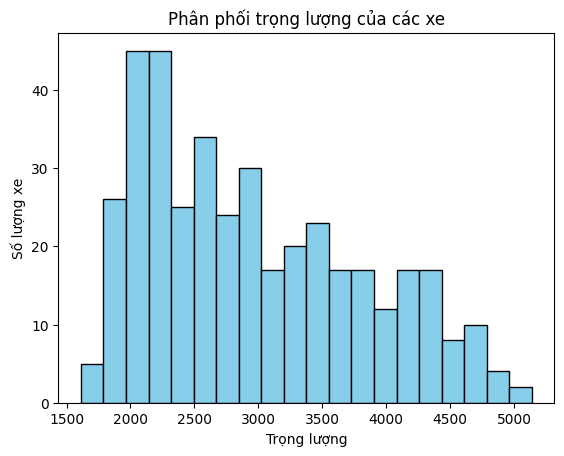

In [14]:
import matplotlib.pyplot as plt

# Giả sử df là DataFrame chứa dữ liệu, có cột 'weight' là trọng lượng của các xe

# Vẽ histogram
plt.hist(pg['weight'], bins=20, color='skyblue', edgecolor='black')

# Đặt tên cho trục x và trục y
plt.xlabel('Trọng lượng')
plt.ylabel('Số lượng xe')

# Đặt tiêu đề cho biểu đồ
plt.title('Phân phối trọng lượng của các xe')

# Hiển thị biểu đồ
plt.show()


## 5. TÍNH TỶ LỆ CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

In [15]:
# Giả sử df là DataFrame chứa dữ liệu, có cột 'origin' là xuất xứ của các dòng xe

# Tính tỷ lệ các dòng xe dựa trên xuất xứ
origin_counts = pg['origin'].value_counts(normalize=True)

# In kết quả
print("Tỷ lệ các dòng xe dựa trên xuất xứ:")
print(origin_counts)


Tỷ lệ các dòng xe dựa trên xuất xứ:
origin
usa       0.625628
japan     0.198492
europe    0.175879
Name: proportion, dtype: float64


## 6. VẼ BOXPLOT SO SÁNH CÔNG SUẤT CỦA CÁC DÒNG XE THẬP NIÊN 70, 80

Lưu ý: Các dòng xe thập niên 70 (1970 - 1979), thập niên 80 (1980 - 1989)

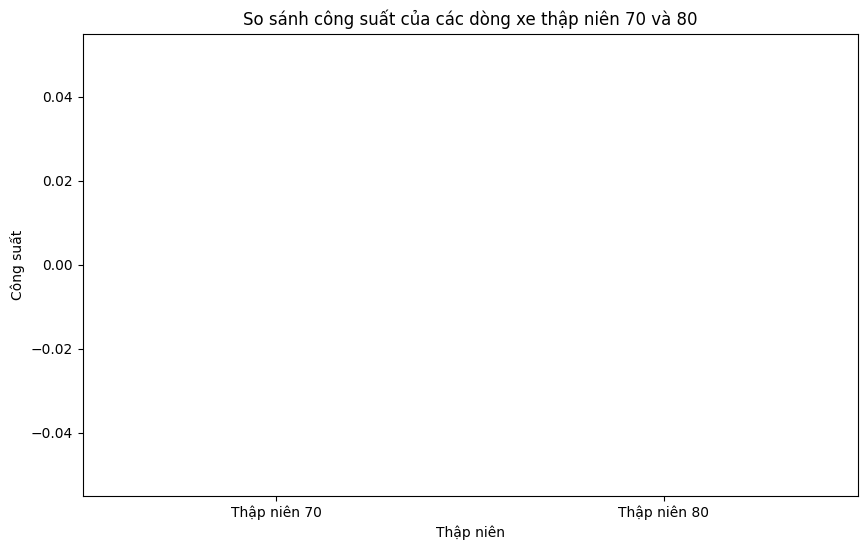

In [22]:
import matplotlib.pyplot as plt


# Lọc ra các mẫu cho các thập niên 70 và 80
pg_70s = pg[(pg['model_year'] >= 1970) & (pg['model_year'] <= 1979)]
pg_80s = pg[(pg['model_year'] >= 1980) & (pg['model_year'] <= 1989)]

# Dữ liệu công suất của các dòng xe thập niên 70 và 80
data_70s = pg_70s['horsepower']
data_80s = pg_80s['horsepower']

# Vẽ boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([data_70s, data_80s], labels=['Thập niên 70', 'Thập niên 80'])

# Đặt tên cho trục x và trục y
plt.xlabel('Thập niên')
plt.ylabel('Công suất')

# Đặt tiêu đề cho biểu đồ
plt.title('So sánh công suất của các dòng xe thập niên 70 và 80')

# Hiển thị biểu đồ
plt.show()


## 7. KHẢO SÁT MỨC TIÊU HAO NHIÊN LIỆU

### 7.1 Với số lượng xi lanh

Thử vẽ bằng đồ thị scatter plot.

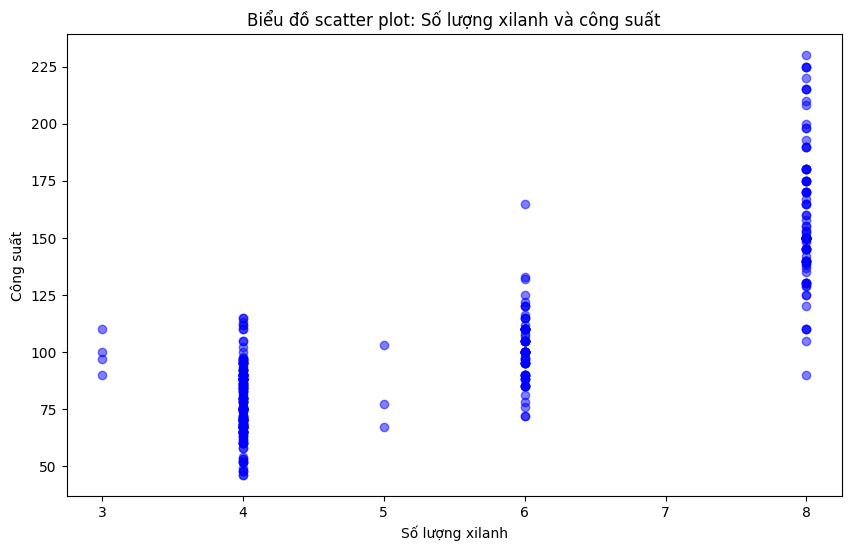

In [23]:
import matplotlib.pyplot as plt

# Vẽ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pg['cylinders'], pg['horsepower'], color='blue', alpha=0.5)

# Đặt tên cho trục x và trục y
plt.xlabel('Số lượng xilanh')
plt.ylabel('Công suất')

# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ scatter plot: Số lượng xilanh và công suất')

# Hiển thị biểu đồ
plt.show()


### 7.2 Với công suất theo mã lực

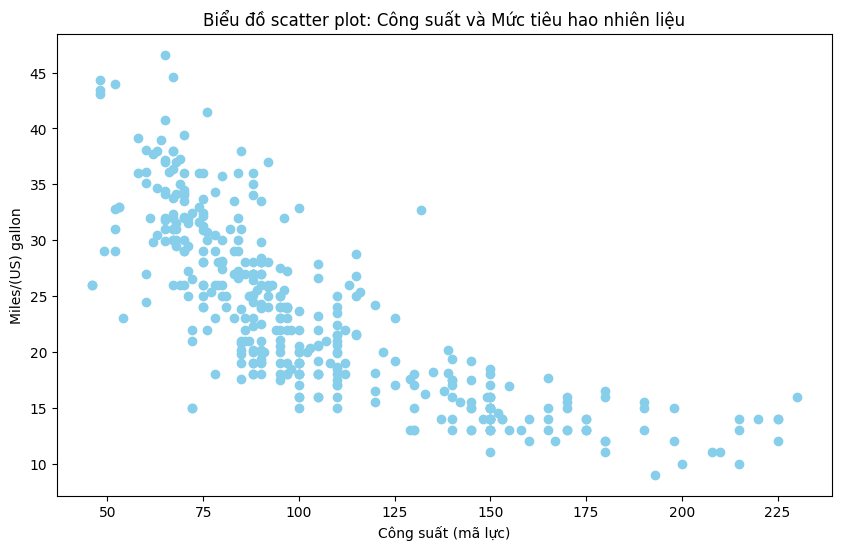

In [24]:
import matplotlib.pyplot as plt

# Dữ liệu công suất và mã lực của các xe từ DataFrame 'pg'
horsepower = pg['horsepower']
mpg = pg['mpg']

# Vẽ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(horsepower, mpg, color='skyblue')

# Đặt tên cho trục x và trục y
plt.xlabel('Công suất (mã lực)')
plt.ylabel('Miles/(US) gallon')

# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ scatter plot: Công suất và Mức tiêu hao nhiên liệu')

# Hiển thị biểu đồ
plt.show()


### 7.3 Với gia tốc

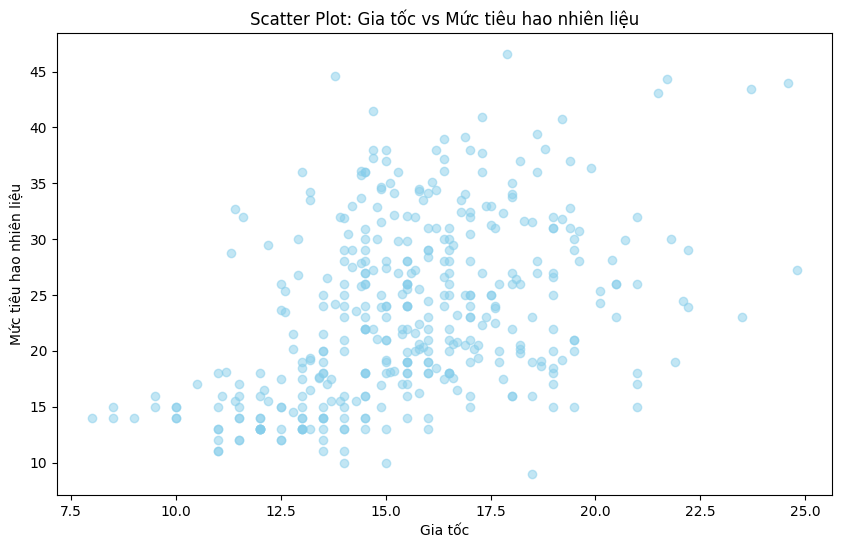

In [25]:
import matplotlib.pyplot as plt

# Giả sử pg là DataFrame chứa dữ liệu, có cột 'acceleration' là gia tốc và cột 'mpg' là mức tiêu hao nhiên liệu

# Dữ liệu gia tốc và mức tiêu hao nhiên liệu
acceleration = pg['acceleration']
mpg = pg['mpg']

# Vẽ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(acceleration, mpg, color='skyblue', alpha=0.5)

# Đặt tên cho trục x và trục y
plt.xlabel('Gia tốc')
plt.ylabel('Mức tiêu hao nhiên liệu')

# Đặt tiêu đề cho biểu đồ
plt.title('Scatter Plot: Gia tốc vs Mức tiêu hao nhiên liệu')

# Hiển thị biểu đồ
plt.show()


### 7.4 Với năm sản xuất

In [ ]:
#3.Chim cánh cụt
import matplotlib.pyplot as plt

# Vẽ đồ thị phân phối của ba loài chim cánh cụt trên ba đảo
plt.figure(figsize=(10, 6))
for island in df['island'].unique():
    data = df[df['island'] == island]
    plt.scatter(data['culmen_length_mm'], data['culmen_depth_mm'], label=island)

# Đặt tên cho trục x và trục y
plt.xlabel('Chiều dài mỏ (mm)')
plt.ylabel('Chiều sâu mỏ (mm)')

# Đặt tiêu đề cho biểu đồ
plt.title('Phân phối của ba loài chim cánh cụt trên ba đảo')

# Hiển thị chú thích về đảo
plt.legend()

# Hiển thị biểu đồ
plt.show()


In [ ]:
#4.Chim cánh cụt
gentoo_data = df[df['species'] == 'Gentoo']
import matplotlib.pyplot as plt

# Vẽ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(gentoo_data['flipper_length_mm'], gentoo_data['body_mass_g'], color='blue')

# Đặt tên cho trục x và trục y
plt.xlabel('Độ dài cánh (mm)')
plt.ylabel('Trọng lượng (g)')

# Đặt tiêu đề cho biểu đồ
plt.title('Mối quan hệ giữa độ dài cánh và trọng lượng của chim cánh cụt Gentoo')

# Hiển thị biểu đồ
plt.show()


2d. Chim cánh cụt
Khác biệt về kích thước giữa các loài chim cánh cụt: Các đại lượng thống kê như giá trị trung bình, trung vị và độ lệch chuẩn cho các thuộc tính như độ dài mỏ, độ sâu mỏ, độ dài cánh và trọng lượng có thể khác biệt đáng kể giữa các loài chim cánh cụt. Điều này có thể phản ánh sự khác biệt trong kích thước và hình dạng của các loài trong môi trường sống khác nhau.

Tương quan giữa các thuộc tính: Chúng ta có thể quan sát tương quan giữa các thuộc tính như độ dài mỏ, độ sâu mỏ, độ dài cánh và trọng lượng. Ví dụ, nếu độ dài mỏ tăng, có thể có xu hướng tăng cả độ sâu mỏ và trọng lượng.

Ảnh hưởng của môi trường sống: So sánh các đại lượng thống kê giữa các đảo có thể cho thấy sự ảnh hưởng của môi trường sống đối với các loài chim cánh cụt. Ví dụ, có thể có sự khác biệt đáng kể trong kích thước của chim cánh cụt trên các đảo khác nhau do điều kiện sống và nguồn lực thức ăn khác nhau.

Cần phân tích chi tiết hơn: Mặc dù chúng ta đã có cái nhìn tổng quan về sự khác biệt giữa các loài chim cánh cụt trên các đảo, nhưng cần phân tích chi tiết hơn và thực hiện các kiểm định thống kê để xác định sự khác biệt có ý nghĩa thống kê giữa các nhóm.


Sự đa dạng trong các đặc điểm vật lý của các loài: Kết quả cho thấy rằng có sự đa dạng đáng kể trong các đặc điểm vật lý như độ dài và độ sâu mỏ, độ dài cánh và trọng lượng giữa các loài chim cánh cụt.

Khác biệt trong kích thước giữa các loài: Các giá trị trung bình và trung vị của các đặc điểm vật lý như độ dài mỏ, độ dài cánh và trọng lượng có thể cho thấy sự khác biệt rõ rệt giữa các loài chim cánh cụt. Ví dụ, có thể thấy rằng loài Gentoo thường có độ dài mỏ lớn hơn và trọng lượng cao hơn so với các loài khác.

Độ lệch chuẩn: Độ lệch chuẩn thường cho biết sự biến động của dữ liệu. Nếu độ lệch chuẩn lớn, điều này có thể chỉ ra rằng có sự biến động lớn trong các đặc điểm vật lý của các loài chim cánh cụt. Điều này có thể phản ánh sự đa dạng tự nhiên hoặc có thể là do sự biến đổi trong môi trường sống của chúng.

In [ ]:
#2c. Chim cánh cụt
summary_stats = df.groupby('species').agg({'bill_length_mm': ['mean', 'median', 'std'],
                                           'bill_depth_mm': ['mean', 'median', 'std'],
                                           'flipper_length_mm': ['mean', 'median', 'std'],
                                           'body_mass_g': ['mean', 'median', 'std']})
print(summary_stats)



4ab. Chim cánh cụt
Bình luận:
a. Dựa vào biểu đồ scatter plot, chúng ta có thể thấy một mối quan hệ dương khá mạnh giữa độ dài cánh và trọng lượng của loài chim cánh cụt Gentoo. Cụ thể, khi độ dài cánh tăng lên, trọng lượng của chim cũng có xu hướng tăng. Điều này cho thấy có sự tương quan giữa hai đại lượng này.

b. Ngoài độ dài cánh, một thuộc tính khác có thể ảnh hưởng đến trọng lượng của loài chim Gentoo là tuổi của chim. Tuổi có thể ảnh hưởng đến trọng lượng thông qua quá trình tăng trưởng và phát triển của chim. Do đó, việc xem xét tuổi của chim cũng là một yếu tố quan trọng để hiểu sâu hơn về mối quan hệ giữa độ dài cánh và trọng lượng của loài chim Gentoo.

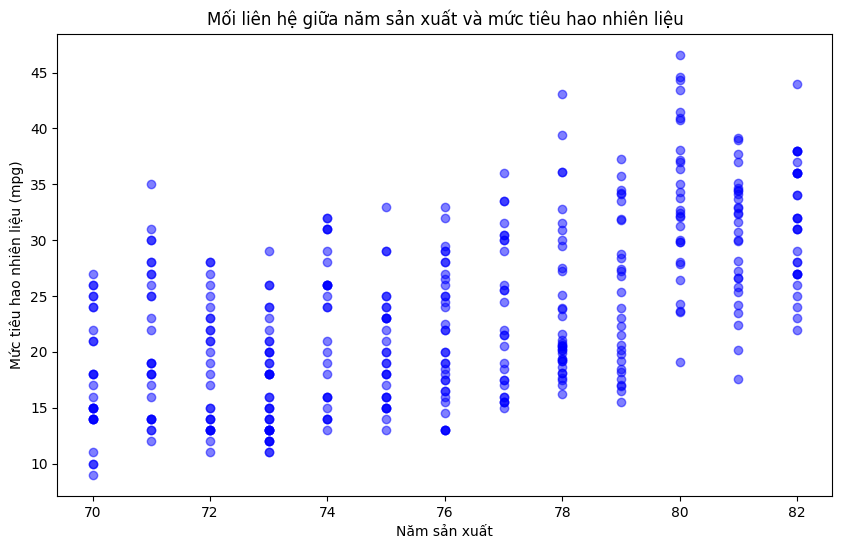

In [27]:
import matplotlib.pyplot as plt

# Vẽ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pg['model_year'], pg['mpg'], color='blue', alpha=0.5)

# Đặt tên cho trục x và trục y
plt.xlabel('Năm sản xuất')
plt.ylabel('Mức tiêu hao nhiên liệu (mpg)')

# Đặt tiêu đề cho biểu đồ
plt.title('Mối liên hệ giữa năm sản xuất và mức tiêu hao nhiên liệu')

# Hiển thị biểu đồ
plt.show()
